In [15]:
import torch
import matplotlib.pyplot as plt

Documentation reference: https://www.learnpytorch.io/01_pytorch_workflow/

## Agenda
In this notebook, we try to build a simple linear regression model using PyTorch library while convering all the major steps that are involved when building a typical ML/AI model.

## Steps involved in building a model

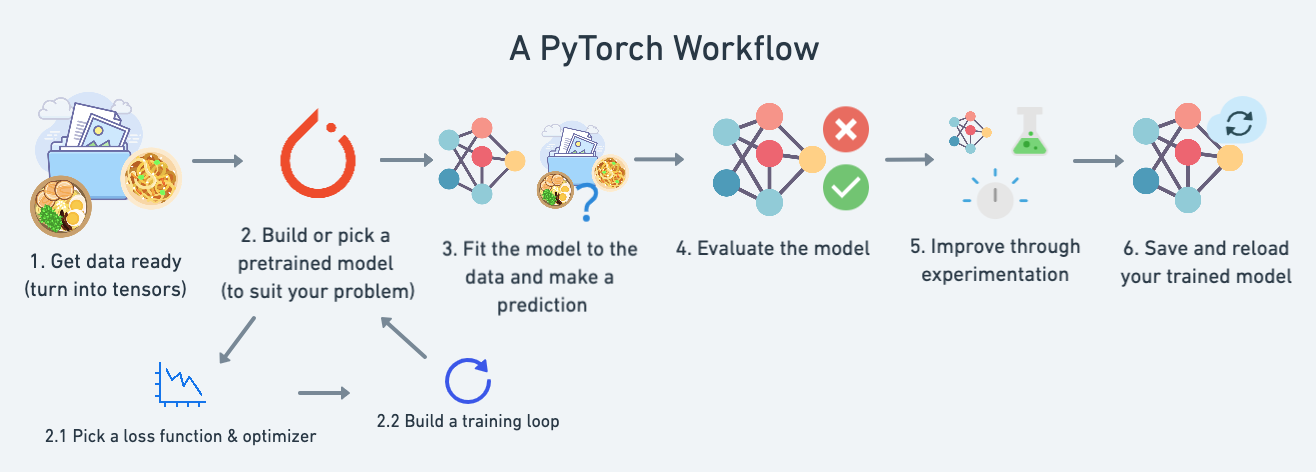

In [ ]:
from PIL import Image

workflow_image = Image.open("/content/pytorch_workflow.png")
workflow_image

## 1. Dataset preparation

As we already know. In order to train a model, we first need to transform our data (could be images, audios, text, etc) into tensors. In this example, we will simply create the dataset tensor directly without using anything like images, audios, etc.

Dataset consists of two important types of variables,

1. Dependent variable:- Value that the model will predict (E.g:- Fruit).
2. Independent variables:- Inputs on which model will decide the dependent variable value (E.g: Sweetness, Price, Season, etc).

In [13]:
# INDEPENDENT VARIABLE
X = torch.arange(0, 100, 0.2)

# KNOWN PARAMETERS
weight = 0.7
bias = 0.3

# DEPENDENT VARIABLE
y = weight * X + bias

In [14]:
print("INDEPENDENT VARIABLE")
print(X)
print()
print("DEPENDENT VARIABLE")
print(y)

INDEPENDENT VARIABLE
tensor([ 0.0000,  0.2000,  0.4000,  0.6000,  0.8000,  1.0000,  1.2000,  1.4000,
         1.6000,  1.8000,  2.0000,  2.2000,  2.4000,  2.6000,  2.8000,  3.0000,
         3.2000,  3.4000,  3.6000,  3.8000,  4.0000,  4.2000,  4.4000,  4.6000,
         4.8000,  5.0000,  5.2000,  5.4000,  5.6000,  5.8000,  6.0000,  6.2000,
         6.4000,  6.6000,  6.8000,  7.0000,  7.2000,  7.4000,  7.6000,  7.8000,
         8.0000,  8.2000,  8.4000,  8.6000,  8.8000,  9.0000,  9.2000,  9.4000,
         9.6000,  9.8000, 10.0000, 10.2000, 10.4000, 10.6000, 10.8000, 11.0000,
        11.2000, 11.4000, 11.6000, 11.8000, 12.0000, 12.2000, 12.4000, 12.6000,
        12.8000, 13.0000, 13.2000, 13.4000, 13.6000, 13.8000, 14.0000, 14.2000,
        14.4000, 14.6000, 14.8000, 15.0000, 15.2000, 15.4000, 15.6000, 15.8000,
        16.0000, 16.2000, 16.4000, 16.6000, 16.8000, 17.0000, 17.2000, 17.4000,
        17.6000, 17.8000, 18.0000, 18.2000, 18.4000, 18.6000, 18.8000, 19.0000,
        19.2000, 19

## Visualizing the data

ML engineers make use of the 'matplotlib.pyplot' library for visualizing our data (can be input, output, etc) into insightful graphs. There is another library called 'seaborn' which can be used to visualize data into more complex forms such as heatmaps but we will not be using it as our dataset is quite simple.

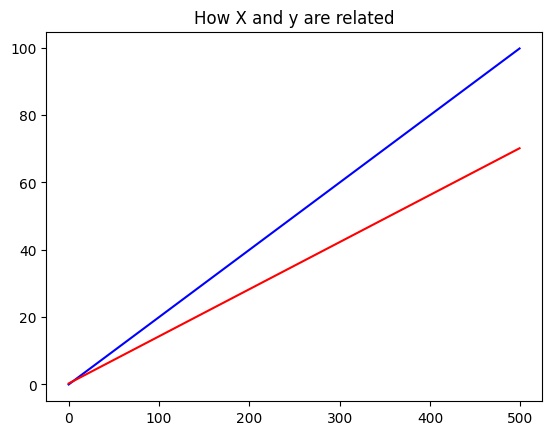

In [46]:
plt.plot(X, color='blue')
plt.plot(y, color='red')
plt.title("How X and y are related")
plt.show()

What can we conclude from the above graph?

1. X is directly proportional to y.
2. X is always greater than or equal to y.
3. X has a steeper slope as compare to y, indicating that as both the values increase, the gap between X and y grows larger and larger.

## Train-Test Split

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:

1. Train:-
  - Part of the dataset that is used to train the model.
  - 80-85% of the dataset.
2. Test:-
  - Part of the dataset that is kept hidden from the model and once the training finishes, is used to test how accurate the final model is.
  - 5-10% of the dataset.
3. Validation:-
  - Part of the dataset that is used to validate the models outputs after every epoch (One iteration over the training data).
  - Kind of like how students revise their concepts once they are done studying.
  - 5-10% of the dataset.

NOTE: If you are not using techniques like cross-validation or a test set early in development, a separate validation set is often necessary. In simpler setups like ours, we may skip validation if hyperparameter tuning isn't required.

In [39]:
# 80% TRAIN AND 20% TEST SPLIT
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train = X[:split_index]
y_train = y[:int(len(y)*split_ratio)]

X_test = X[split_index:]
y_test = y[int(len(y)*split_ratio):]

In [40]:
print(f"First {split_index}: Training set,")
print(len(X_train))
print(len(y_train))
print()
print(f"Remaining {int(len(X)) - split_index}: Test set,")
print(len(X_test))
print(len(y_test))

First 400: Training set,
400
400

Remaining 100: Test set,
100
100


In [43]:
y_train

tensor([ 0.3000,  0.4400,  0.5800,  0.7200,  0.8600,  1.0000,  1.1400,  1.2800,
         1.4200,  1.5600,  1.7000,  1.8400,  1.9800,  2.1200,  2.2600,  2.4000,
         2.5400,  2.6800,  2.8200,  2.9600,  3.1000,  3.2400,  3.3800,  3.5200,
         3.6600,  3.8000,  3.9400,  4.0800,  4.2200,  4.3600,  4.5000,  4.6400,
         4.7800,  4.9200,  5.0600,  5.2000,  5.3400,  5.4800,  5.6200,  5.7600,
         5.9000,  6.0400,  6.1800,  6.3200,  6.4600,  6.6000,  6.7400,  6.8800,
         7.0200,  7.1600,  7.3000,  7.4400,  7.5800,  7.7200,  7.8600,  8.0000,
         8.1400,  8.2800,  8.4200,  8.5600,  8.7000,  8.8400,  8.9800,  9.1200,
         9.2600,  9.4000,  9.5400,  9.6800,  9.8200,  9.9600, 10.1000, 10.2400,
        10.3800, 10.5200, 10.6600, 10.8000, 10.9400, 11.0800, 11.2200, 11.3600,
        11.5000, 11.6400, 11.7800, 11.9200, 12.0600, 12.2000, 12.3400, 12.4800,
        12.6200, 12.7600, 12.9000, 13.0400, 13.1800, 13.3200, 13.4600, 13.6000,
        13.7400, 13.8800, 14.0200, 14.16

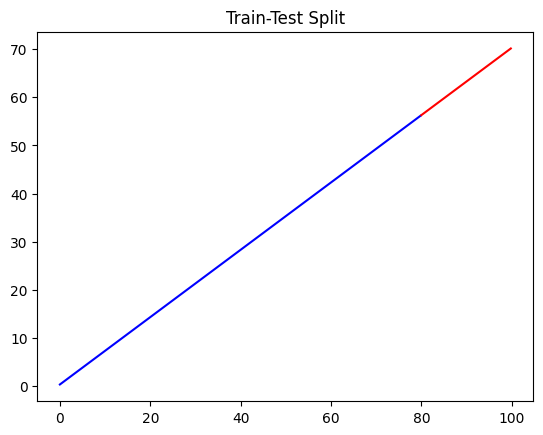

In [51]:
plt.plot(X_train, y_train, color='blue')
plt.plot(X_test, y_test, color='red')
plt.title("Train-Test Split")
plt.show()

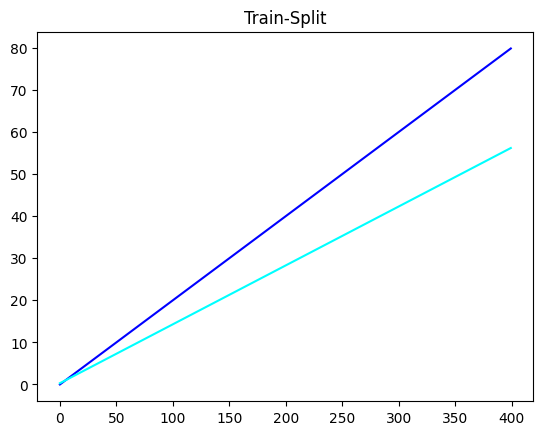

In [53]:
plt.plot(X_train, color='blue')
plt.plot(y_train, color='cyan')
plt.title("Train-Split")
plt.show()

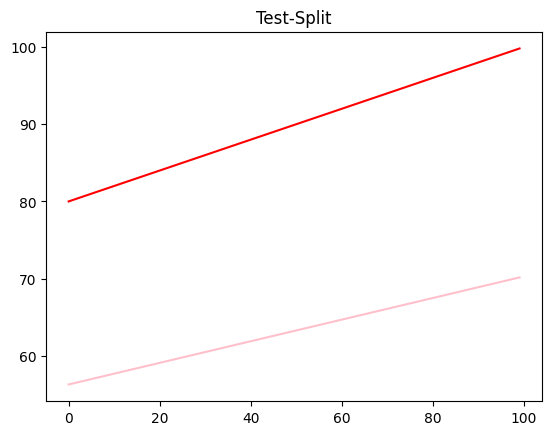

In [57]:
plt.plot(X_test, color='red')
plt.plot(y_test, color='pink')
plt.title("Test-Split")
plt.show()